In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn  
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, Input, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.losses import SparseCategoricalCrossentropy, MSE, MAE
from sklearn.metrics import confusion_matrix, classification_report 
import PyQt5
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from aux_func import show_history

In [2]:
from tensorflow.keras.datasets import cifar100
(X_train, y_train), (X_validation, y_validation) = cifar100.load_data()

Lo que haremos a continuación, es normalizar las imágenes. Esto es, dividiremos cada elemento de x_train_original y xtestoriginal por el numero de píxeles, es decir, 255. Con esto obtenemos que el array comprenderá valores de entre 0 y 1. Con esto el entrenamiento suele aportar mejores resultados.

In [3]:
X_train = X_train/255
X_validation = X_validation/255

In [4]:
print('Número de elementos en el dataset = ',X_train.shape[0]+X_validation.shape[0])

Número de elementos en el dataset =  60000


# Cifar 100 modelo 1



In [6]:
# capas de la red
input = Input(shape=(32,32,3))
input_flat = layers.Flatten()(input)
layer = layers.Dense(units=1000, activation='sigmoid')(input_flat)
layer = layers.Dense(units=500, activation='sigmoid')(layer)
layer = layers.Dense(units=200, activation='sigmoid')(layer)
output = layers.Dense(units=100, activation='softmax')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              3073000   
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
Total params: 3,693,800
Trainable params: 3,693,800
Non-trainable params: 0
____________________________________________

In [7]:
history = model.fit(x=X_train, y=y_train, batch_size=30, epochs=20, validation_data=(X_validation, y_validation))

Epoch 1/20
1667/1667 [==============================] - 21s 12ms/step - loss: 4.6183 - accuracy: 0.0106 - val_loss: 4.6059 - val_accuracy: 0.0100
Epoch 2/20
1667/1667 [==============================] - 20s 12ms/step - loss: 4.6074 - accuracy: 0.0107 - val_loss: 4.6039 - val_accuracy: 0.0137
Epoch 3/20
1667/1667 [==============================] - 20s 12ms/step - loss: 4.6044 - accuracy: 0.0114 - val_loss: 4.6013 - val_accuracy: 0.0100
Epoch 4/20
1667/1667 [==============================] - 20s 12ms/step - loss: 4.6015 - accuracy: 0.0125 - val_loss: 4.5980 - val_accuracy: 0.0130
Epoch 5/20
1667/1667 [==============================] - 20s 12ms/step - loss: 4.5975 - accuracy: 0.0138 - val_loss: 4.5933 - val_accuracy: 0.0163
Epoch 6/20
1667/1667 [==============================] - 20s 12ms/step - loss: 4.5927 - accuracy: 0.0171 - val_loss: 4.5873 - val_accuracy: 0.0135
Epoch 7/20
1667/1667 [==============================] - 20s 12ms/step - loss: 4.5859 - accuracy: 0.0205 - val_loss: 4.5797 -

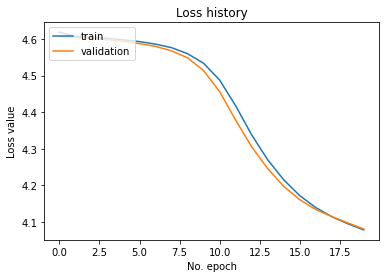

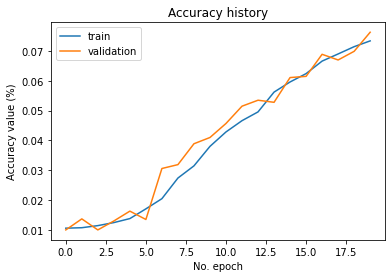

In [8]:
from aux_func import show_history
show_history(history)

In [9]:
print('modelo3-val accuracy:', history.history['val_accuracy'][-1])

modelo3-val accuracy: 0.0763000026345253


# Modelo2
(Cambio función de activación)


In [49]:
# capas del modelo
input = Input(shape=(32,32,3))
input_flat = layers.Flatten()(input)
layer_1= layers.Dense(units=1000, activation='relu')(input_flat)
layer_2= layers.Dense(units=500, activation='relu')(layer_1)
layer_3= layers.Dense(units=200, activation='relu')(layer_2)
output = layers.Dense(units=100, activation='softmax')(layer_3)

model2 = Model(inputs=input, outputs=output)

print(model2.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
model2.compile(optimizer=optimizer, loss=loss, metrics=metrics)


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              3073000   
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
Total params: 3,693,800
Trainable params: 3,693,800
Non-trainable params: 0
____________________________________________

In [50]:
history2 =model2.fit(x=X_train, y=y_train, batch_size=30, epochs=20,
                           validation_data=(X_validation, y_validation))

Epoch 1/20
1667/1667 [==============================] - 24s 15ms/step - loss: 4.2478 - accuracy: 0.0610 - val_loss: 3.9504 - val_accuracy: 0.1039
Epoch 2/20
1667/1667 [==============================] - 23s 14ms/step - loss: 3.8347 - accuracy: 0.1178 - val_loss: 3.7535 - val_accuracy: 0.1329
Epoch 3/20
1667/1667 [==============================] - 24s 14ms/step - loss: 3.6675 - accuracy: 0.1479 - val_loss: 3.6420 - val_accuracy: 0.1509
Epoch 4/20
1667/1667 [==============================] - 24s 14ms/step - loss: 3.5567 - accuracy: 0.1664 - val_loss: 3.5647 - val_accuracy: 0.1651
Epoch 5/20
1667/1667 [==============================] - 23s 14ms/step - loss: 3.4649 - accuracy: 0.1814 - val_loss: 3.5211 - val_accuracy: 0.1768
Epoch 6/20
1667/1667 [==============================] - 24s 15ms/step - loss: 3.3873 - accuracy: 0.1970 - val_loss: 3.4668 - val_accuracy: 0.1884
Epoch 7/20
1667/1667 [==============================] - 25s 15ms/step - loss: 3.3178 - accuracy: 0.2114 - val_loss: 3.4092 -

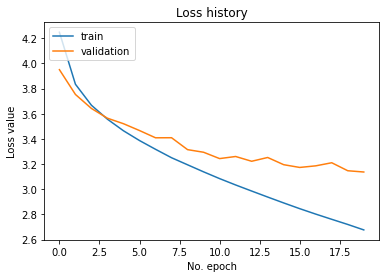

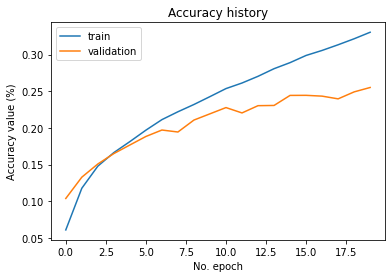

In [51]:
show_history(history2)

In [52]:
print('modelo2-val accuracy:', history2.history['val_accuracy'][-1])

modelo2-val accuracy: 0.25519999861717224


# Modelo 3

In [14]:
# capas del modelo
input = Input(shape=(32,32,3))
input_flat = layers.Flatten()(input)
layer_1= layers.Dense(units=1000, activation='relu')(input_flat)
layer_2= layers.Dense(units=500, activation='relu')(layer_1)
layer_3= layers.Dense(units=200, activation='relu')(layer_2)
output = layers.Dense(units=100, activation='softmax')(layer_3)

model3 = Model(inputs=input, outputs=output)

print(model3.summary())

# optimizador
optimizer = Adam(learning_rate=0.001)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
model3.compile(optimizer=optimizer, loss=loss, metrics=metrics)


Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dense_9 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_10 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               20100     
Total params: 3,693,800
Trainable params: 3,693,800
Non-trainable params: 0
____________________________________________

In [15]:
history3 =model3.fit(x=X_train, y=y_train, batch_size=30, epochs=20,
                           validation_data=(X_validation, y_validation))

Epoch 1/20
1667/1667 [==============================] - 28s 17ms/step - loss: 4.2312 - accuracy: 0.0528 - val_loss: 3.9284 - val_accuracy: 0.0896
Epoch 2/20
1667/1667 [==============================] - 28s 17ms/step - loss: 3.7996 - accuracy: 0.1096 - val_loss: 3.7163 - val_accuracy: 0.1285
Epoch 3/20
1667/1667 [==============================] - 28s 17ms/step - loss: 3.6322 - accuracy: 0.1410 - val_loss: 3.5662 - val_accuracy: 0.1510
Epoch 4/20
1667/1667 [==============================] - 28s 17ms/step - loss: 3.5166 - accuracy: 0.1582 - val_loss: 3.5402 - val_accuracy: 0.1670
Epoch 5/20
1667/1667 [==============================] - 28s 17ms/step - loss: 3.4231 - accuracy: 0.1796 - val_loss: 3.4466 - val_accuracy: 0.1816
Epoch 6/20
1667/1667 [==============================] - 28s 17ms/step - loss: 3.3481 - accuracy: 0.1919 - val_loss: 3.4260 - val_accuracy: 0.1858
Epoch 7/20
1667/1667 [==============================] - 28s 17ms/step - loss: 3.2909 - accuracy: 0.2021 - val_loss: 3.4349 -

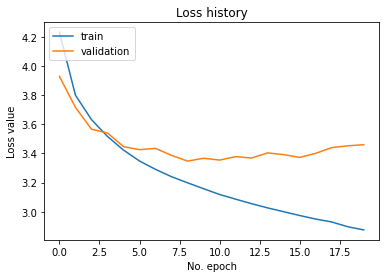

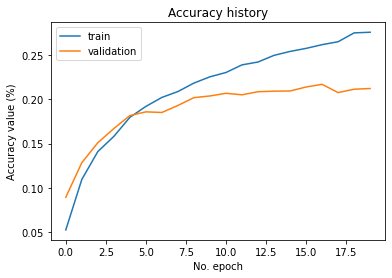

In [16]:
show_history(history3)

Se aprecia overfitting

In [17]:
print('modelo3-val accuracy:', history3.history['val_accuracy'][-1])

modelo3-val accuracy: 0.21209999918937683


# Modelo 4
(Variamos un poco todo)

In [18]:
# capas del modelo
input = Input(shape=(32,32,3))
input_flat = layers.Flatten()(input)
layer_1= layers.Dense(units=5000, activation='relu')(input_flat)
layer_2= layers.Dense(units=2500, activation='relu')(layer_1)
layer_3= layers.Dense(units=1000, activation='relu')(layer_2)
layer_4= layers.Dense(units=500, activation='relu')(layer_3)
layer_5= layers.Dense(units=200, activation='relu')(layer_4)
output = layers.Dense(units=100, activation='softmax')(layer_5)

model4 = Model(inputs=input, outputs=output)

print(model4.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
model4.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 5000)              15365000  
_________________________________________________________________
dense_13 (Dense)             (None, 2500)              12502500  
_________________________________________________________________
dense_14 (Dense)             (None, 1000)              2501000   
_________________________________________________________________
dense_15 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_16 (Dense)             (None, 200)              

In [19]:
history4 =model4.fit(x=X_train, y=y_train, batch_size=20, epochs=15,
                           validation_data=(X_validation, y_validation))

Epoch 1/15
2500/2500 [==============================] - 261s 105ms/step - loss: 4.1754 - accuracy: 0.0658 - val_loss: 3.9071 - val_accuracy: 0.1009
Epoch 2/15
2500/2500 [==============================] - 258s 103ms/step - loss: 3.7469 - accuracy: 0.1285 - val_loss: 3.6657 - val_accuracy: 0.1441
Epoch 3/15
2500/2500 [==============================] - 252s 101ms/step - loss: 3.5575 - accuracy: 0.1596 - val_loss: 3.4928 - val_accuracy: 0.1812
Epoch 4/15
2500/2500 [==============================] - 253s 101ms/step - loss: 3.4194 - accuracy: 0.1858 - val_loss: 3.4070 - val_accuracy: 0.1887
Epoch 5/15
2500/2500 [==============================] - 254s 102ms/step - loss: 3.3100 - accuracy: 0.2062 - val_loss: 3.3646 - val_accuracy: 0.2056
Epoch 6/15
2500/2500 [==============================] - 256s 102ms/step - loss: 3.2139 - accuracy: 0.2224 - val_loss: 3.3109 - val_accuracy: 0.2116
Epoch 7/15
2500/2500 [==============================] - 255s 102ms/step - loss: 3.1261 - accuracy: 0.2380 - val_

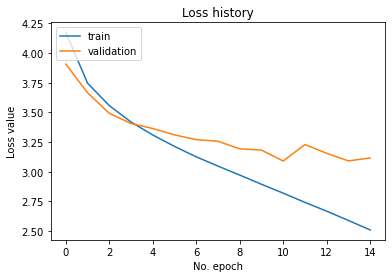

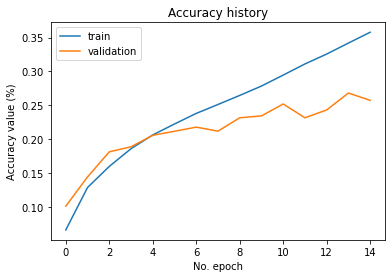

In [20]:
show_history(history4)

In [21]:
print('modelo4-val accuracy:', history4.history['val_accuracy'][-1])

modelo4-val accuracy: 0.2572999894618988


# Modelo5

In [70]:
# capas del modelo
input = Input(shape=(32,32,3))
input_flat = layers.Flatten()(input)
layer_1= layers.Dense(units=5000, activation='sigmoid')(input_flat)
layer_2= layers.Dense(units=2500, activation='sigmoid')(layer_1)
layer_5= layers.Dense(units=200, activation='sigmoid')(layer_2)
output = layers.Dense(units=100, activation='softmax')(layer_5)

model5 = Model(inputs=input, outputs=output)

print(model5.summary())

# optimizador
optimizer = Adam(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
model5.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 5000)              15365000  
_________________________________________________________________
dense_23 (Dense)             (None, 2500)              12502500  
_________________________________________________________________
dense_24 (Dense)             (None, 200)               500200    
_________________________________________________________________
dense_25 (Dense)             (None, 100)               20100     
Total params: 28,387,800
Trainable params: 28,387,800
Non-trainable params: 0
_________________________________________

In [71]:
history5 =model5.fit(x=X_train, y=y_train, batch_size=30, epochs=20,
                           validation_data=(X_validation, y_validation))

Epoch 1/20
1667/1667 [==============================] - 255s 153ms/step - loss: 4.9837 - accuracy: 0.0103 - val_loss: 4.8537 - val_accuracy: 0.0100
Epoch 2/20
1667/1667 [==============================] - 246s 148ms/step - loss: 4.9664 - accuracy: 0.0101 - val_loss: 4.9918 - val_accuracy: 0.0100
Epoch 3/20
1667/1667 [==============================] - 243s 146ms/step - loss: 4.9731 - accuracy: 0.0096 - val_loss: 5.0607 - val_accuracy: 0.0100
Epoch 4/20
1667/1667 [==============================] - 243s 146ms/step - loss: 4.9758 - accuracy: 0.0103 - val_loss: 5.0302 - val_accuracy: 0.0100
Epoch 5/20
1667/1667 [==============================] - 243s 146ms/step - loss: 4.9757 - accuracy: 0.0098 - val_loss: 4.9902 - val_accuracy: 0.0100
Epoch 6/20
1667/1667 [==============================] - 243s 146ms/step - loss: 4.9754 - accuracy: 0.0108 - val_loss: 4.8826 - val_accuracy: 0.0100
Epoch 7/20
1667/1667 [==============================] - 243s 146ms/step - loss: 4.9739 - accuracy: 0.0100 - val_

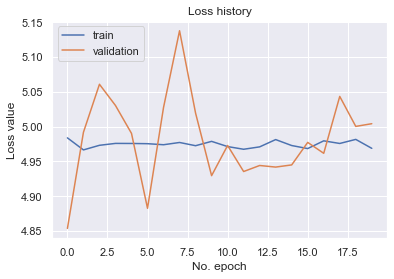

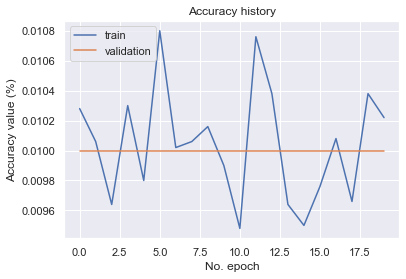

In [72]:
show_history(history5)

In [73]:
print('modelo5-val accuracy:', history5.history['val_accuracy'][-1])

modelo5-val accuracy: 0.009999999776482582


# Modelo6 

In [74]:
# capas del modelo
input = Input(shape=(32,32,3))
input_flat = layers.Flatten()(input)
layer_1= layers.Dense(units=100, activation='relu')(input_flat)
layer_2= layers.Dense(units=75, activation='relu')(layer_1)
layer_3= layers.Dense(units=50, activation='relu')(layer_2)
output = layers.Dense(units=100, activation='relu')(layer_3)

model6 = Model(inputs=input, outputs=output)

print(model6.summary())

# optimizador
optimizer = Adam(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
model6.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 100)               307300    
_________________________________________________________________
dense_27 (Dense)             (None, 75)                7575      
_________________________________________________________________
dense_28 (Dense)             (None, 50)                3800      
_________________________________________________________________
dense_29 (Dense)             (None, 100)               5100      
Total params: 323,775
Trainable params: 323,775
Non-trainable params: 0
_______________________________________________

In [75]:
history6 =model6.fit(x=X_train, y=y_train, batch_size=30, epochs=20,
                           validation_data=(X_validation, y_validation))

Epoch 1/20
1667/1667 [==============================] - 3s 2ms/step - loss: 16.4034 - accuracy: 0.0098 - val_loss: 16.4084 - val_accuracy: 0.0100
Epoch 2/20
1667/1667 [==============================] - 3s 2ms/step - loss: 16.4084 - accuracy: 0.0100 - val_loss: 16.4084 - val_accuracy: 0.0100
Epoch 3/20
1667/1667 [==============================] - 3s 2ms/step - loss: 16.4084 - accuracy: 0.0100 - val_loss: 16.4084 - val_accuracy: 0.0100
Epoch 4/20
1667/1667 [==============================] - 3s 2ms/step - loss: 16.4084 - accuracy: 0.0100 - val_loss: 16.4084 - val_accuracy: 0.0100
Epoch 5/20
1667/1667 [==============================] - 3s 2ms/step - loss: 16.4084 - accuracy: 0.0100 - val_loss: 16.4084 - val_accuracy: 0.0100
Epoch 6/20
1667/1667 [==============================] - 3s 2ms/step - loss: 16.4084 - accuracy: 0.0100 - val_loss: 16.4084 - val_accuracy: 0.0100
Epoch 7/20
1667/1667 [==============================] - 3s 2ms/step - loss: 16.4084 - accuracy: 0.0100 - val_loss: 16.4084 -

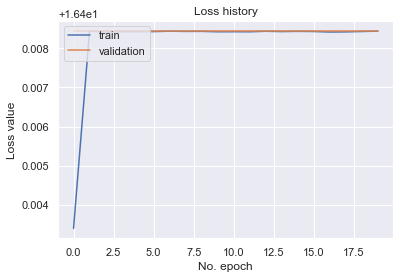

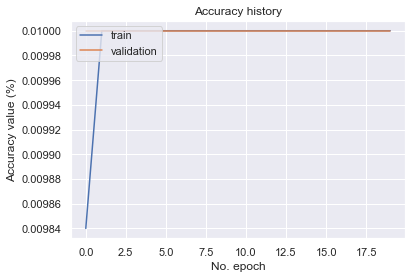

In [76]:
show_history(history6)

In [77]:
print('modelo6-val accuracy:', history6.history['val_accuracy'][-1])

modelo6-val accuracy: 0.009999999776482582


# Modelo Seleccionado


Selecciono el modelo 2

In [78]:
model=model2
history=history2

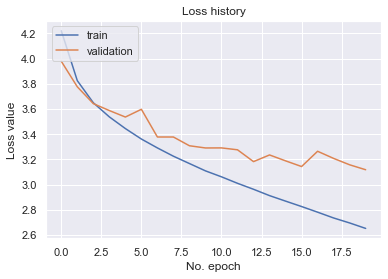

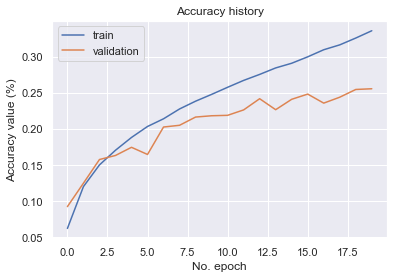

In [79]:
show_history(history2)

Score vs Batch_size

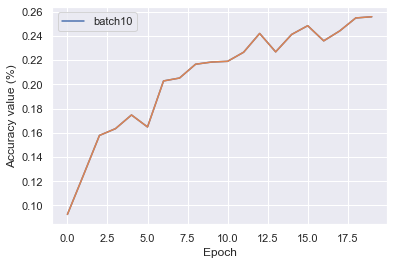

In [80]:
batches=['batch5', 'batch10'] #, 'batch20', 'batch25', 'batch50']
values=[5,10] #,20,25,50]
for i in range(0,len(values)):
  plt.plot(history.history['val_accuracy'], label=batches[i])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy value (%)')
  plt.legend([batches[i]], loc='upper left')

In [81]:
# predecimos con el modelo entrenado los 10 primero elementos del dataset
y_true = y_validation
print('y_true:', y_true)

y_pred = model.predict(X_validation)
y_predicted = np.argmax(y_pred, axis=-1) 
print('y_pred:', y_predicted)

y_true: [[49]
 [33]
 [72]
 ...
 [51]
 [42]
 [70]]
y_pred: [12 42 15 ... 51 34 45]


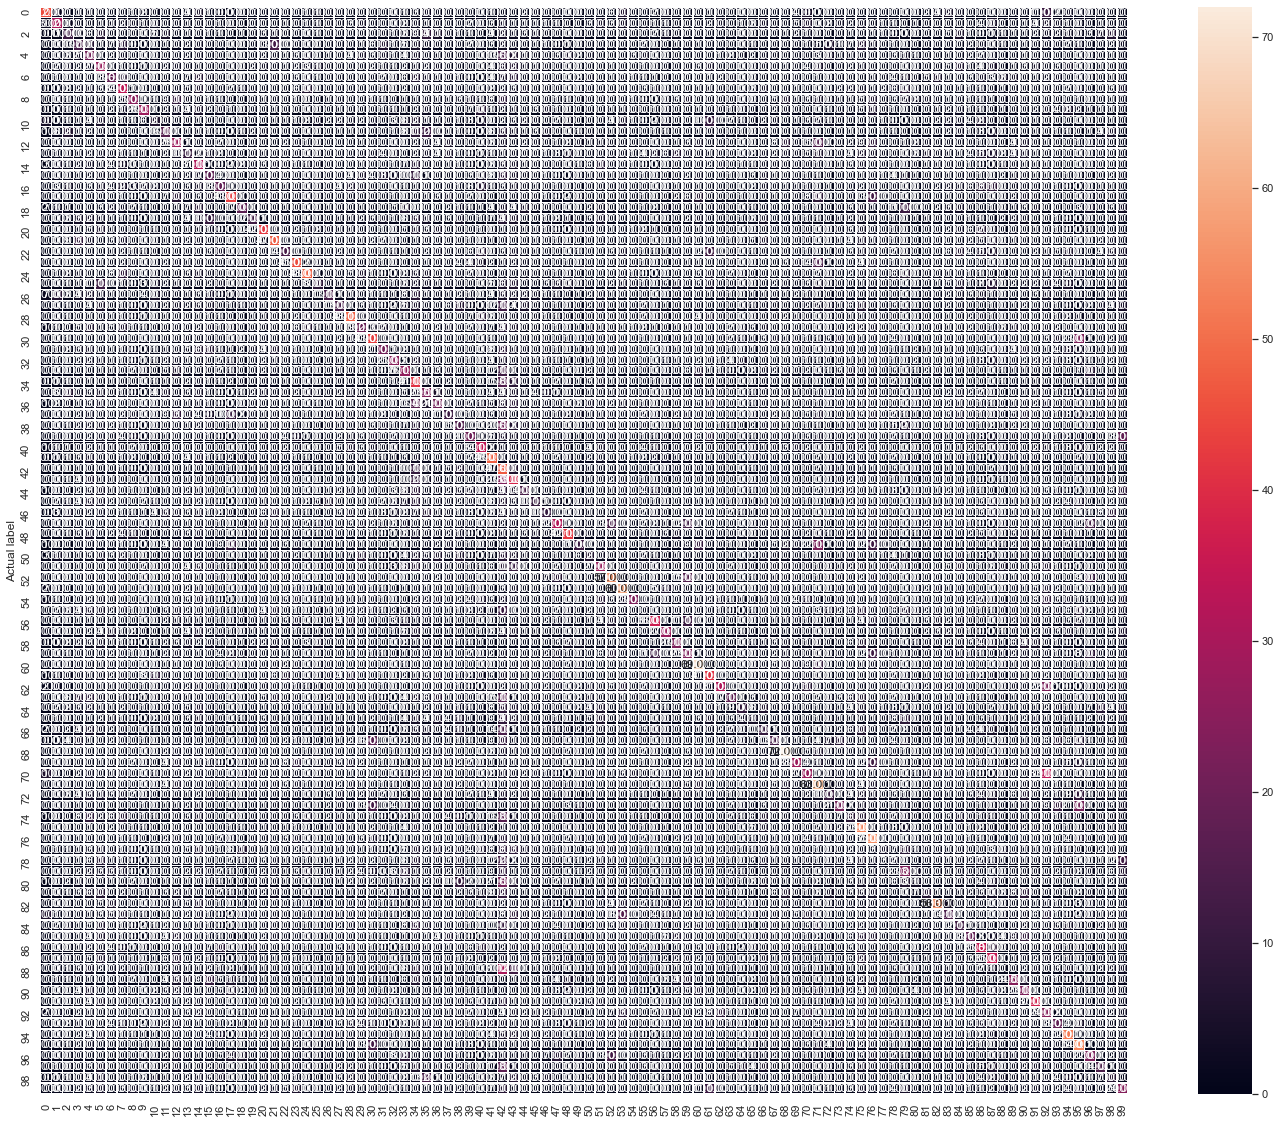

In [82]:
#Creamos la matriz de confusión
model_cm = confusion_matrix(y_true, y_predicted)

# Visualizamos la matriz de confusión
plt.figure(figsize = (25,20))  
sn.set(font_scale=1) #for label size  
sn.heatmap(model_cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label');
plt.show()  

In [83]:
model_report = classification_report(np.argmax(y_true, axis=1), y_predicted)  
print(model_report)

              precision    recall  f1-score   support

           0       1.00      0.01      0.02     10000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

C:\Users\malon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of X_validation: {}".format(X_validation.shape))
print("Shape of y_validation: {}".format(y_validation.shape))

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)

Shape of X_validation: (10000, 32, 32, 3)
Shape of y_validation: (10000, 1)


In [85]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train.reshape(X_train.shape[0], X_train.shape[1]* X_train.shape[2]* X_train.shape[3]), y_train.reshape(y_train.shape[0], ))
clf_pred=clf.predict(X_validation.reshape(X_validation.shape[0], X_validation.shape[1]* X_validation.shape[2]* X_validation.shape[3]))
print('score rf = ',clf.score(X_validation.reshape(X_validation.shape[0], X_validation.shape[1]* X_validation.shape[2]* X_validation.shape[3]), y_validation.reshape(y_validation.shape[0], )))

score rf =  0.1257


In [86]:
model_report = classification_report(np.argmax(y_true, axis=1), clf_pred)  
print(model_report)

              precision    recall  f1-score   support

           0       1.00      0.04      0.08     10000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

C:\Users\malon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
from lightgbm import LGBMClassifier
GBC = LGBMClassifier(n_estimators=10)
GBC.fit(X_train.reshape(X_train.shape[0], X_train.shape[1]* X_train.shape[2]* X_train.shape[3]), y_train.reshape(y_train.shape[0], ))
GBC_pred=GBC.predict(X_validation.reshape(X_validation.shape[0], X_validation.shape[1]* X_validation.shape[2]* X_validation.shape[3]))
print('score lgbm = ',GBC.score(X_validation.reshape(X_validation.shape[0], X_validation.shape[1]* X_validation.shape[2]* X_validation.shape[3]), y_validation.reshape(y_validation.shape[0], )))

score lgbm =  0.118


In [114]:
model_report = classification_report(np.argmax(y_true, axis=1), GBC_pred)  
print(model_report)

              precision    recall  f1-score   support

           0       1.00      0.01      0.02     10000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

C:\Users\malon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random forest sobre el histograma del LBP y una red neuronal sobre el histograma del LBP

In [6]:
import cv2
from skimage import feature

In [31]:
data=list()
for image in X_train:
    im=cv2.cvtColor(image.astype('float32'),cv2.COLOR_BGR2GRAY)
    lbp=feature.local_binary_pattern(im,32,8)
    (hist,_)=np.histogram(lbp.ravel(), bins=np.arange(0,35), range=(0,34))
    hist=hist.astype("float")
    hist/=(hist.sum()+ 1e-7)
    data.append(hist.tolist())
    
data= np.array(data)
    

In [46]:
data2=list()
for image in X_validation:
    im=cv2.cvtColor(image.astype('float32'),cv2.COLOR_BGR2GRAY)
    lbp=feature.local_binary_pattern(im,32,8)
    (hist,_)=np.histogram(lbp.ravel(), bins=np.arange(0,35), range=(0,34))
    hist=hist.astype("float")
    hist/=(hist.sum()+ 1e-7)
    data2.append(hist.tolist())
    
data2= np.array(data2)

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf.fit(data.reshape((X_train.shape[0],-1)), y_train.reshape((-1,1)))
print('score rf = ',clf.score(data2.reshape((X_validation.shape[0],-1)), y_validation.reshape((-1,1))))

<ipython-input-47-349c83fd8e0e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(data.reshape((X_train.shape[0],-1)), y_train.reshape((-1,1)))


score rf =  0.0117


In [ ]:
#la red neuronal
history=model.fit(x=data, y=y_train, batch_size=30, epochs=20,
                           validation_data=(data2, y_validation))

In [ ]:
show_history(history)